In [10]:
# ===========================================
# Final Team Project - Full Machine Learning Pipeline
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_curve, auc
)
import os

In [22]:
# Or for zip files
!wget https://github.com/vxdao01/504/tree/modeling/census-income
!unzip census-income

--2025-08-04 03:54:25--  https://github.com/vxdao01/504/tree/modeling/census-income
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘census-income’

census-income           [ <=>                ] 175.36K  --.-KB/s    in 0.1s    

2025-08-04 03:54:25 (1.75 MB/s) - ‘census-income’ saved [179571]

Archive:  census-income
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of census-income or
        census-income.zip, and cannot find census-income.ZIP, period.


In [23]:
# !pwd
# !ls
os.chdir('/content/drive/My Drive/Colab Notebooks/ADS-504-Final-Project')

In [24]:
# === NEW GOOGLE COLAB FILE PATHS ===
train_path = "/content/drive/My Drive/Colab Notebooks/ADS-504-Final-Project/adult.data"
test_path = "/content/drive/My Drive/Colab Notebooks/ADS-504-Final-Project/adult.test"

# === FILE PATHS ===
# train_path = r"C:\Users\User\Downloads\census+income\adult.data"
# test_path = r"C:\Users\User\Downloads\census+income\adult.test"

In [25]:
# === COLUMN NAMES ===
columns = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]

# === 1. DATASET INTRODUCTION ===
print("📌 PROJECT INTRODUCTION:")
print("""
The goal of this project is to predict whether an individual earns more than $50K per year
based on demographic and employment attributes from the UCI Adult Census dataset.

This problem is important because it demonstrates how demographic and employment features
can be leveraged to identify income patterns. Machine learning models can help in policy-making,
targeted services, and socio-economic research by revealing key factors that influence income levels.
""")

# === LOAD DATA ===
df_train = pd.read_csv(train_path, header=None, names=columns, na_values=" ?", skipinitialspace=True)
df_test = pd.read_csv(test_path, header=None, names=columns, na_values=" ?", skipinitialspace=True, comment='|', skiprows=1)
df = pd.concat([df_train, df_test], ignore_index=True)

print(f"\n✅ Dataset loaded successfully. Shape: {df.shape}")

# === VARIABLE DESCRIPTIONS ===
var_desc = pd.DataFrame({
    "Feature": columns,
    "Description": [
        "Age of the individual",
        "Type of employment",
        "Census final weight (sample size indicator)",
        "Highest level of education attained",
        "Number of years of education",
        "Marital status",
        "Occupation type",
        "Relationship status",
        "Race",
        "Gender",
        "Capital gain",
        "Capital loss",
        "Average hours worked per week",
        "Country of origin",
        "Income class (<=50K or >50K)"
    ],
    "Type": ["Numeric", "Categorical", "Numeric", "Categorical", "Numeric", "Categorical",
             "Categorical", "Categorical", "Categorical", "Categorical", "Numeric",
             "Numeric", "Numeric", "Categorical", "Target"]
})
print("\n📊 Variable Descriptions:")
print(var_desc)

# === 2. PREPROCESSING ===
print("\n🧹 PREPROCESSING STARTED...")

# Drop missing values
df.dropna(inplace=True)

# Remove extra spaces
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Fix target variable encoding
df["income"] = df["income"].replace({">50K.": ">50K", "<=50K.": "<=50K"}).map({"<=50K": 0, ">50K": 1})

# Remove duplicates
df.drop_duplicates(inplace=True)

print(f"✅ Data cleaned. New shape: {df.shape}")

📌 PROJECT INTRODUCTION:

The goal of this project is to predict whether an individual earns more than $50K per year
based on demographic and employment attributes from the UCI Adult Census dataset.

This problem is important because it demonstrates how demographic and employment features
can be leveraged to identify income patterns. Machine learning models can help in policy-making,
targeted services, and socio-economic research by revealing key factors that influence income levels.


✅ Dataset loaded successfully. Shape: (48842, 15)

📊 Variable Descriptions:
           Feature                                  Description         Type
0              age                        Age of the individual      Numeric
1        workclass                           Type of employment  Categorical
2           fnlwgt  Census final weight (sample size indicator)      Numeric
3        education          Highest level of education attained  Categorical
4    education_num                 Number of year

/tmp/ipython-input-4135311693.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


✅ Data cleaned. New shape: (48790, 15)


In [29]:
# Save cleaned raw dataset
# df.to_csv(r"C:\Users\User\Downloads\census+income\cleaned_raw_full.csv", index=False)
df.to_csv(r"C:\Users\celin\OneDrive\Education\USD-MS-ADS\ADS-504\Final-Project\cleaned_raw_full.csv", index=False)

After running the cell above and successfully mounting your Google Drive, run the following code to update the file paths in the first code cell to access the datasets directly from your Drive. Remember to replace the placeholder paths with the actual paths to your files within your Google Drive.

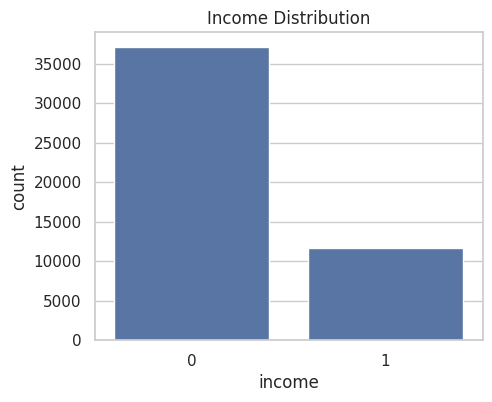


🔍 Insight: The dataset is imbalanced, with the majority earning <=50K.


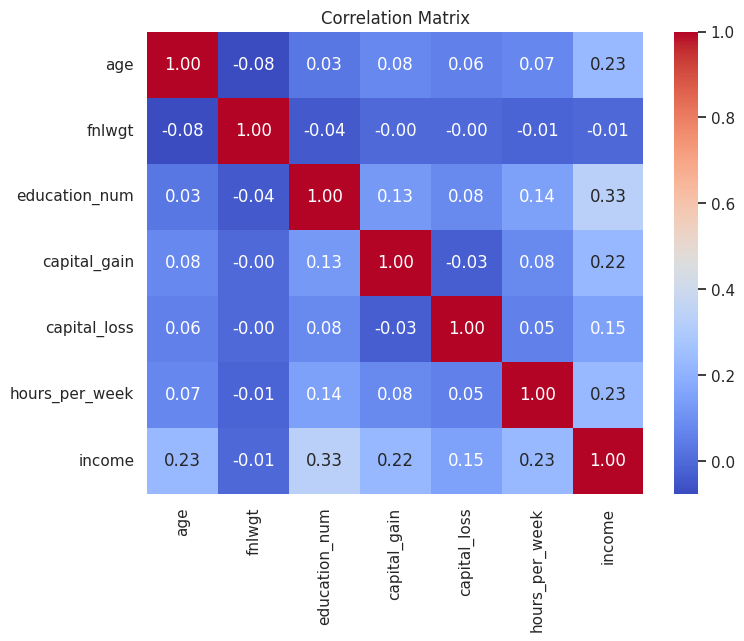

🔍 Insight: Education_num, capital_gain, and hours_per_week have the strongest positive correlation with income.


In [30]:
# === 3. EXPLORATORY DATA ANALYSIS (EDA) ===
sns.set(style="whitegrid")

# Income distribution
plt.figure(figsize=(5, 4))
sns.countplot(x="income", data=df)
plt.title("Income Distribution")
plt.show()
print("\n🔍 Insight: The dataset is imbalanced, with the majority earning <=50K.")

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
print("🔍 Insight: Education_num, capital_gain, and hours_per_week have the strongest positive correlation with income.")

# === 4. ENCODING & SCALING ===
df_encoded = pd.get_dummies(df, columns=[
    "workclass", "education", "marital_status", "occupation",
    "relationship", "race", "sex", "native_country"
])

# Scale numeric features EXCEPT target
numeric_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()
features_to_scale = [col for col in numeric_cols if col != "income"]

scaler = StandardScaler()
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [31]:
# Save modeling-ready dataset
# df_encoded.to_csv(r"C:\Users\User\Downloads\census+income\cleaned_data_encoded_scaled.csv", index=False)
df_encoded.to_csv(r"C:\Users\celin\OneDrive\Education\USD-MS-ADS\ADS-504\Final-Project\cleaned_raw_full.csv", index=False)

In [ ]:
# === 5. TRAIN/TEST SPLIT ===
X = df_encoded.drop("income", axis=1)
y = df_encoded["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 6. MODELING & VALIDATION ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    results.append({
        "Model": name,
        "CV Mean Accuracy": cv_scores.mean(),
        "Test Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "AUC": auc_score
    })

    # Classification report
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(f"Cross-Validation Accuracy (Mean ± Std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Confusion Matrix
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["<=50K", ">50K"]).plot(
        cmap='Blues' if name=="Logistic Regression" else 'Greens'
    )
    plt.title(f"{name} Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f})")

# === 7. ROC Curve Comparison ===
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# === 8. MODEL PERFORMANCE COMPARISON TABLE ===
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Comparison:")
print(results_df)

# === 9. BEST MODEL SELECTION & INSIGHTS ===
best_model = results_df.sort_values(by="Test Accuracy", ascending=False).iloc[0]
print(f"\n✅ Best performing model: {best_model['Model']} "
      f"with {best_model['Test Accuracy']:.4f} accuracy and {best_model['AUC']:.4f} AUC.")
print("💡 Insight: Logistic Regression is easier to interpret, "
      "while Random Forest may capture complex feature interactions better.")